# Assignment 5: Cross Validation, Hyperparameter Tunning, Model Selection and Model Evaluation

You need write the code of
* Cross validation,
* Hyperparameter Tunning,
* Model Selection and
* Model Evaluation
  using sklearn
-----------------------------------------------------------------------------------
  as discussed in the class but datasets should be different from those used in the lectures.

# **CROSS VALIDATION**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
csp_data = pd.read_csv('https://raw.githubusercontent.com/M-Talha-Farooqi/Machine-Learning-CourseWork/refs/heads/main/DataSets/college_student_placement_dataset.csv')

In [3]:
csp_data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
csp_data.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No
9999,CLG0060,109,9.41,9.77,8,No,3,5,5,No


In [5]:
csp_data.shape

(10000, 10)

In [6]:
csp_data.isnull().sum()

,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


In [7]:
print(csp_data['Placement'].value_counts())

Placement
No     8341
Yes    1659
Name: count, dtype: int64


In [8]:
# Mapping 'No' and 'Yes' to numerical values for 'Placement'
csp_data['Placement'] = csp_data['Placement'].map({'No': 0, 'Yes': 1})
print("\nDistribution after mapping:")
print(csp_data['Placement'].value_counts())


Distribution after mapping:
Placement
0    8341
1    1659
Name: count, dtype: int64


In [9]:
# Defining 0 and 1 for 'Placement'
print("\n0 --> No Placement")
print("1 --> Placed")


0 --> No Placement
1 --> Placed


In [10]:
categorical_cols_to_encode = ['Internship_Experience']

print(f"\n--- Applying One-Hot Encoding to: {categorical_cols_to_encode} ---")
csp_data_processed = pd.get_dummies(csp_data, columns=categorical_cols_to_encode, drop_first=True)


--- Applying One-Hot Encoding to: ['Internship_Experience'] ---


In [11]:
print("\n--- ev_data after One-Hot Encoding (head) ---")
csp_data_processed.head()


--- ev_data after One-Hot Encoding (head) ---


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,Internship_Experience_Yes
0,CLG0030,107,6.61,6.28,8,8,8,4,0,False
1,CLG0061,97,5.52,5.37,8,7,8,0,0,False
2,CLG0036,109,5.36,5.83,9,3,1,1,0,False
3,CLG0055,122,5.47,5.75,6,1,6,1,0,True
4,CLG0004,96,7.91,7.69,7,8,10,2,0,False


In [12]:

print("\n--- Data Types after One-Hot Encoding ---")
csp_data_processed.dtypes


--- Data Types after One-Hot Encoding ---


,0
College_ID,object
IQ,int64
Prev_Sem_Result,float64
CGPA,float64
Academic_Performance,int64
Extra_Curricular_Score,int64
Communication_Skills,int64
Projects_Completed,int64
Placement,int64
Internship_Experience_Yes,bool


In [13]:
# Splitting the Features and Target
# Drop 'College_IDIQ' as bcz it is an identifier and 'Placement' which is your target
X = csp_data_processed.drop(columns=['College_ID', 'Placement'], axis=1)
Y = csp_data_processed['Placement']


In [14]:
print("\nFeatures (X) head:")
X.head()


Features (X) head:


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_Experience_Yes
0,107,6.61,6.28,8,8,8,4,False
1,97,5.52,5.37,8,7,8,0,False
2,109,5.36,5.83,9,3,1,1,False
3,122,5.47,5.75,6,1,6,1,True
4,96,7.91,7.69,7,8,10,2,False


In [15]:
print("\nTarget (Y) head:")
Y.head()


Target (Y) head:


,Placement
0,0
1,0
2,0
3,0
4,0


### Train Test Split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42) # Changed random_state for variety

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (8000, 8)
Shape of X_test: (2000, 8)
Shape of Y_train: (8000,)
Shape of Y_test: (2000,)


In [17]:
# List of models to compare
models = [
    LogisticRegression(max_iter=1000),
    SVC(kernel='linear'),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state=42)
]

In [18]:
def compare_models_train_test():
    for model in models:
        # Training the model
        print(f"\nTraining and evaluating {type(model).__name__}...")
        model.fit(X_train, Y_train)

        # Evaluating the model
        test_data_prediction = model.predict(X_test)
        accuracy = accuracy_score(Y_test, test_data_prediction)
        print(f'Accuracy score of the {type(model).__name__} = {accuracy}')

In [19]:
compare_models_train_test()


Training and evaluating LogisticRegression...
Accuracy score of the LogisticRegression = 0.9035

Training and evaluating SVC...
Accuracy score of the SVC = 0.903

Training and evaluating KNeighborsClassifier...
Accuracy score of the KNeighborsClassifier = 0.9445

Training and evaluating RandomForestClassifier...
Accuracy score of the RandomForestClassifier = 0.9985


In [20]:
# Cross Validation

# Logistic Regression
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), X, Y, cv=5)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.901  0.9045 0.9025 0.902  0.8955]
90.11


In [21]:
# Support Vector Classifier
cv_score_svc = cross_val_score(SVC(kernel='linear'), X, Y, cv=5)

print(cv_score_svc)

mean_accuracy_svc = sum(cv_score_svc)/len(cv_score_svc)

mean_accuracy_svc = mean_accuracy_svc*100

mean_accuracy_svc = round(mean_accuracy_svc, 2)

print(mean_accuracy_svc)

[0.9005 0.9025 0.9035 0.9025 0.896 ]
90.1


In [22]:
# K-Neighbors Classifier

cv_score_knn = cross_val_score(KNeighborsClassifier(), X, Y, cv=5)

print(cv_score_knn)

mean_accuracy_knn = np.mean(cv_score_knn)

mean_accuracy_knn = mean_accuracy_knn * 100

mean_accuracy_knn = round(mean_accuracy_knn, 2)

print(mean_accuracy_knn)

[0.9395 0.9445 0.9415 0.9375 0.936 ]
93.98


In [23]:
# Random Forest Classifier

cv_score_rf = cross_val_score(RandomForestClassifier(random_state=42), X, Y, cv=5) # Added random_state for reproducibility

print(cv_score_rf)

mean_accuracy_rf = np.mean(cv_score_rf)

mean_accuracy_rf = mean_accuracy_rf * 100

mean_accuracy_rf = round(mean_accuracy_rf, 2)

print(mean_accuracy_rf)

[0.9995 0.9995 1.     0.9995 0.9995]
99.96


In [24]:
# Creating a Function to compare the models

def compare_models_cross_validation():
  for model in models:
    cv_score = cross_val_score(model, X, Y, cv=5)

    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, ' = ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('---------------------------------------------------------')

In [25]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=1000)  =  [0.901  0.9045 0.9025 0.902  0.8955]
Accuracy % of the  LogisticRegression(max_iter=1000) 90.11
---------------------------------------------------------
Cross Validation accuracies for  SVC(kernel='linear')  =  [0.9005 0.9025 0.9035 0.9025 0.896 ]
Accuracy % of the  SVC(kernel='linear') 90.1
---------------------------------------------------------
Cross Validation accuracies for  KNeighborsClassifier()  =  [0.9395 0.9445 0.9415 0.9375 0.936 ]
Accuracy % of the  KNeighborsClassifier() 93.98
---------------------------------------------------------
Cross Validation accuracies for  RandomForestClassifier(random_state=42)  =  [0.9995 0.9995 1.     0.9995 0.9995]
Accuracy % of the  RandomForestClassifier(random_state=42) 99.96
---------------------------------------------------------


# **HYPER PARAMETER TUNING**

## Two Methods:
1. Grid Search CV
2. Randomized Search CV

# Grid Search CV

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [27]:
# loading the SVC model
model = SVC()

In [28]:
# hyperparameters
parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1, 5, 10, 20]
}

In [29]:
# grid search
classifier = GridSearchCV(model, parameters, cv=5)

In [30]:
# fitting the data to our model
classifier.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [31]:
classifier.cv_results_

{'mean_fit_time': array([ 5.80825911,  0.97001586,  0.96852279,  1.49156561, 20.29217072,
         0.96610336,  1.06039028,  1.40612645, 34.96742458,  1.20315104,
         0.88755293,  1.44741631, 56.89937506,  1.34374514,  0.8854805 ,
         1.38961296]),
 'std_fit_time': array([0.38912068, 0.14625258, 0.15638258, 0.34872814, 0.76262648,
        0.06672506, 0.22939446, 0.10213002, 0.88845739, 0.2130307 ,
        0.04087126, 0.37613948, 2.00938389, 0.2391414 , 0.09284129,
        0.37300687]),
 'mean_score_time': array([0.09530635, 0.16489339, 0.40343752, 0.31400118, 0.10283628,
        0.11372662, 0.27259045, 0.32984958, 0.09052305, 0.12534142,
        0.21274443, 0.31321278, 0.115277  , 0.11315789, 0.23986425,
        0.28191166]),
 'std_score_time': array([0.00589888, 0.04115821, 0.15169084, 0.08790325, 0.02307463,
        0.00148512, 0.07705161, 0.07332014, 0.0012919 , 0.02715703,
        0.00199026, 0.0943882 , 0.03051722, 0.00441004, 0.07288085,
        0.04546622]),
 'param_C'

In [32]:
# best parameters
best_parameters = classifier.best_params_
print(best_parameters)

{'C': 20, 'kernel': 'rbf'}


In [33]:
# highest accuracy
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9102


In [34]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.808259,0.389121,0.095306,0.005899,1,linear,"{'C': 1, 'kernel': 'linear'}",0.9005,0.9025,0.9035,0.9025,0.8960,0.9010,0.002683,7
1,0.970016,0.146253,0.164893,0.041158,1,poly,"{'C': 1, 'kernel': 'poly'}",0.8955,0.8985,0.8985,0.8925,0.8965,0.8963,0.002227,11
2,0.968523,0.156383,0.403438,0.151691,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.8775,0.8825,0.8750,0.8800,0.8840,0.8798,0.003265,12
3,1.491566,0.348728,0.314001,0.087903,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.7205,0.7010,0.6945,0.7055,0.8190,0.7281,0.046249,13
4,20.292171,0.762626,0.102836,0.023075,5,linear,"{'C': 5, 'kernel': 'linear'}",0.9015,0.9030,0.9025,0.9030,0.8965,0.9013,0.002462,6


In [38]:
grid_search_result = result[['param_C', 'param_kernel', 'mean_test_score']]

* Highest Accuracy: 91.0 %
* Best Parameter: { "C":20 , "Kernel": rbf}

# Randomized Search CV

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [40]:
# loading the SVC model
model = SVC()

In [41]:
# hyperparameters
parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1, 5, 10, 20]
}

In [42]:
# grid search
classifier = RandomizedSearchCV(model, parameters, cv=5)

In [43]:
# fitting the data to our model
classifier.fit(X, Y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [44]:
classifier.cv_results_

{'mean_fit_time': array([20.36247439, 35.01718926,  1.40183525,  1.13387723,  1.2791584 ,
         1.04301648, 56.52682619,  0.96856399,  1.05110736,  1.37054019]),
 'std_fit_time': array([0.72771077, 0.98190222, 0.2706253 , 0.24051822, 0.26319733,
        0.23567541, 1.68733844, 0.1765615 , 0.04042399, 0.18083318]),
 'mean_score_time': array([0.10280066, 0.10255809, 0.28439841, 0.1311429 , 0.27429695,
        0.34858651, 0.1026968 , 0.1638937 , 0.11078286, 0.12524114]),
 'std_score_time': array([0.02448103, 0.02256311, 0.04233014, 0.03243878, 0.0489486 ,
        0.0879195 , 0.02105018, 0.0448398 , 0.00241819, 0.02575097]),
 'param_kernel': masked_array(data=['linear', 'linear', 'sigmoid', 'poly', 'sigmoid',
                    'rbf', 'linear', 'poly', 'poly', 'poly'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'param_C': masked_array(data=[5, 10, 1, 5, 20, 

In [45]:
# best parameters
best_parameters = classifier.best_params_
print(best_parameters)

{'kernel': 'linear', 'C': 20}


In [46]:
# highest accuracy
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9019


In [47]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,20.362474,0.727711,0.102801,0.024481,linear,5,"{'kernel': 'linear', 'C': 5}",0.9015,0.9030,0.9025,0.9030,0.8965,0.9013,0.002462,3
1,35.017189,0.981902,0.102558,0.022563,linear,10,"{'kernel': 'linear', 'C': 10}",0.9015,0.9030,0.9015,0.9045,0.8970,0.9015,0.002510,2
2,1.401835,0.270625,0.284398,0.042330,sigmoid,1,"{'kernel': 'sigmoid', 'C': 1}",0.7205,0.7010,0.6945,0.7055,0.8190,0.7281,0.046249,9
3,1.133877,0.240518,0.131143,0.032439,poly,5,"{'kernel': 'poly', 'C': 5}",0.8985,0.9025,0.8985,0.8985,0.8925,0.8981,0.003200,6
4,1.279158,0.263197,0.274297,0.048949,sigmoid,20,"{'kernel': 'sigmoid', 'C': 20}",0.7100,0.6870,0.6820,0.6920,0.8180,0.7178,0.050984,10


In [48]:
randomized_search_result = result[['param_C', 'param_kernel', 'mean_test_score']]
randomized_search_result

,param_C,param_kernel,mean_test_score
0,5,linear,0.9013
1,10,linear,0.9015
2,1,sigmoid,0.7281
3,5,poly,0.8981
4,20,sigmoid,0.7178
5,1,rbf,0.8798
6,20,linear,0.9019
7,1,poly,0.8963
8,10,poly,0.8992
9,20,poly,0.9003


* Highest Accuracy: 90.6 %
* Best Parameter: { "C":10 , "Kernel": rbf}

# Model Selection

## 1. Comparing the models with default Hyperparameters values using Cross Validation

In [49]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

def compare_models_cross_validation():
    for model in models:
        cv_score = cross_val_score(model, X, Y, cv=5)
        mean_score = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_score*100
        mean_accuracy = round(mean_accuracy, 2)

        print('Cross Validation accuracies for the',model,':', cv_score)
        print('Accuracy score of the ',model,' = ',mean_accuracy,'%')
        print('-------------------------------------------------------------')

In [50]:
compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) : [0.901  0.9045 0.9025 0.902  0.8955]
Accuracy score of the  LogisticRegression(max_iter=1000)  =  90.11 %
-------------------------------------------------------------
Cross Validation accuracies for the SVC(kernel='linear') : [0.9005 0.9025 0.9035 0.9025 0.896 ]
Accuracy score of the  SVC(kernel='linear')  =  90.1 %
-------------------------------------------------------------
Cross Validation accuracies for the KNeighborsClassifier() : [0.9395 0.9445 0.9415 0.9375 0.936 ]
Accuracy score of the  KNeighborsClassifier()  =  93.98 %
-------------------------------------------------------------
Cross Validation accuracies for the RandomForestClassifier(random_state=0) : [1.     1.     1.     0.9995 1.    ]
Accuracy score of the  RandomForestClassifier(random_state=0)  =  99.99 %
-------------------------------------------------------------


# 2. Comparing Models with different Hyper Parameter values using Grid Search CV

In [51]:
# list of models
models_list = [LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

# creating a dictionary that contains hyperparameter values for the above mentioned models
model_hyperparameters = {
    'log_reg_hyperparameters': {
        'C': [1,5,10,20]
    },
    'svc_hyperparameters': {
        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,20]
    },
    'knn_hyperparameters': {
        'n_neighbors' : [3,5,10]
    },
    'random_forest_hyperparameters': {
        'n_estimators' : [10, 20, 50, 100]
    }
}

type(model_hyperparameters)

dict

In [52]:
print(model_hyperparameters.keys())

dict_keys(['log_reg_hyperparameters', 'svc_hyperparameters', 'knn_hyperparameters', 'random_forest_hyperparameters'])


In [53]:
model_hyperparameters['log_reg_hyperparameters']

{'C': [1, 5, 10, 20]}

In [54]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'knn_hyperparameters', 'random_forest_hyperparameters']


In [55]:
model_keys[0]

'log_reg_hyperparameters'

In [56]:
model_hyperparameters[model_keys[0]]

{'C': [1, 5, 10, 20]}

## Applying Grid Search CV

In [57]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

    result = []
    i = 0

    for model in list_of_models:

        key = model_keys[i]
        params = hyperparameters_dictionary[key]

        i += 1

        print(model)
        print(params)
        print('--------------------------------------------------')

        classifier = GridSearchCV(model, params, cv=5)

        # fitting the data to classifier
        classifier.fit(X,Y)

        result.append({
            'model used' : model,
            'highest score' : classifier.best_score_,
            'best hyperparameters' : classifier.best_params_
        })

    result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])
    return result_dataframe


In [58]:
ModelSelection(models_list, model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
--------------------------------------------------
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
--------------------------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
--------------------------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
--------------------------------------------------


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=10000),0.9015,{'C': 20}
1,SVC(),0.9102,"{'C': 20, 'kernel': 'rbf'}"
2,KNeighborsClassifier(),0.9398,{'n_neighbors': 5}
3,RandomForestClassifier(random_state=0),1.0000,{'n_estimators': 50}


Random Forest Classifier Model with n_estimators = 50 has the highest accuracy of 100%.

# Model Evaluation

1. Accuracy Score
2. Confusion Matrix
3. Precision
4. Recall
5. F1 Score

# Accuracy Score

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Printing the shapes of the original data and the split data
print(X.shape, X_train.shape, X_test.shape)

# --- Block 2: Model Training ---
from sklearn.linear_model import LogisticRegression

# Instantiate the LogisticRegression model
# max_iter is set to 1000 to ensure convergence for larger datasets
model = LogisticRegression(max_iter=1000)

(10000, 8) (8000, 8) (2000, 8)


In [61]:

# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [62]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(training_data_accuracy)

0.902875


In [63]:
print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

Accuracy on Training data :  90.29 %


In [64]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(test_data_accuracy)

0.8955


In [65]:
print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')

Accuracy on Test data :  89.55 %


# Confusion Matrix

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
cf_matrix = confusion_matrix(Y_test, X_test_prediction)
print(cf_matrix)

[[1598   70]
 [ 139  193]]


In [68]:
tn, fp, fn, tp = cf_matrix.ravel()
print(tn, fp, fn, tp)

1598 70 139 193


<Axes: >

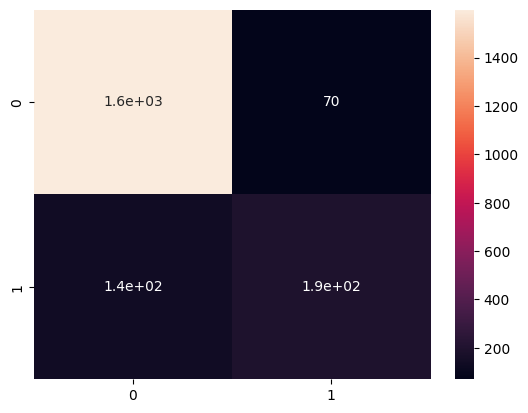

In [69]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

# Precision

In [70]:
from sklearn.metrics import precision_score

In [71]:
# precision for training data predictions
precision_train = precision_score(Y_train, X_train_prediction)
print('Training data Precision =', precision_train)

Training data Precision = 0.753690036900369


In [72]:
# precision for test data predictions
precision_test = precision_score(Y_test, X_test_prediction)
print('Test data Precision =', precision_test)

Test data Precision = 0.7338403041825095


# Recall

In [73]:
from sklearn.metrics import recall_score

In [74]:
# recall for training data predictions
recall_train = recall_score(Y_train, X_train_prediction)
print('Training data Recall =', recall_train)

Training data Recall = 0.6156744536548606


In [75]:
# recall for test data predictions
recall_test = recall_score(Y_test, X_test_prediction)
print('Test data Recall =', recall_test)

Test data Recall = 0.5813253012048193


# F1 Score

In [76]:
from sklearn.metrics import f1_score

In [77]:
# F1 score for training data predictions
f1_score_train = f1_score(Y_train, X_train_prediction)
print('Training data F1 Score =', f1_score_train)

Training data F1 Score = 0.6777270841974284


In [78]:
# F1 Score for test data predictions
f1_score_test = recall_score(Y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)

Test data F1 Score = 0.5813253012048193


# --------------------------------- END -----------------------------